In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [4]:
@staticmethod
def factor(df):
    '''ATR过滤器'''
    high_low = df['high'] - df['low']
    high_close = abs(df['high'] - df['close'].shift(1))
    low_close = abs(df['low'] - df['close'].shift(1))
    true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    atr = true_range.rolling(14).mean()
    return atr

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.007865
   Rank_IC (Spearman): 0.017087
📊 信息比率:
   IR: 0.142351
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 131022
   因子列: factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


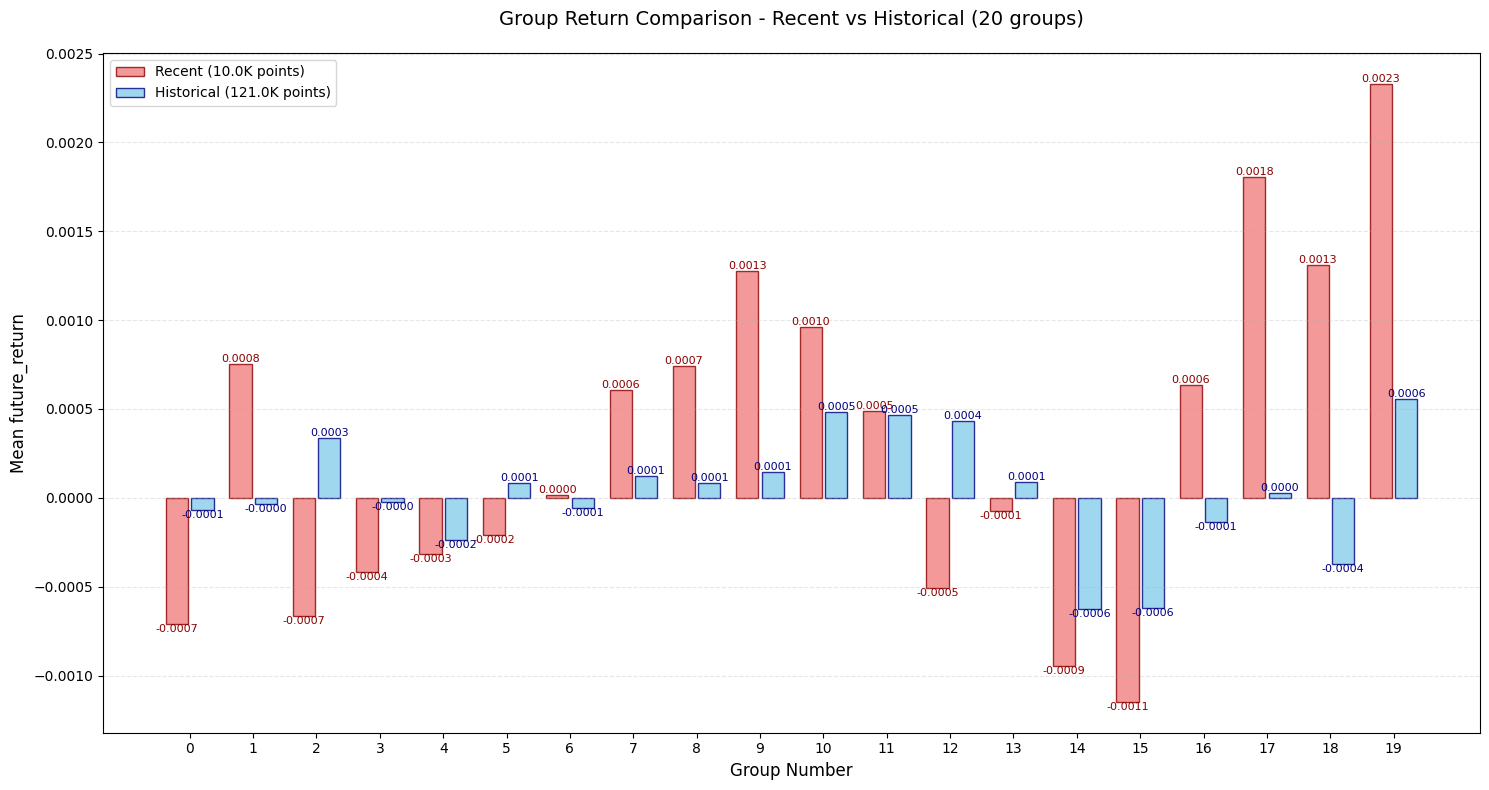

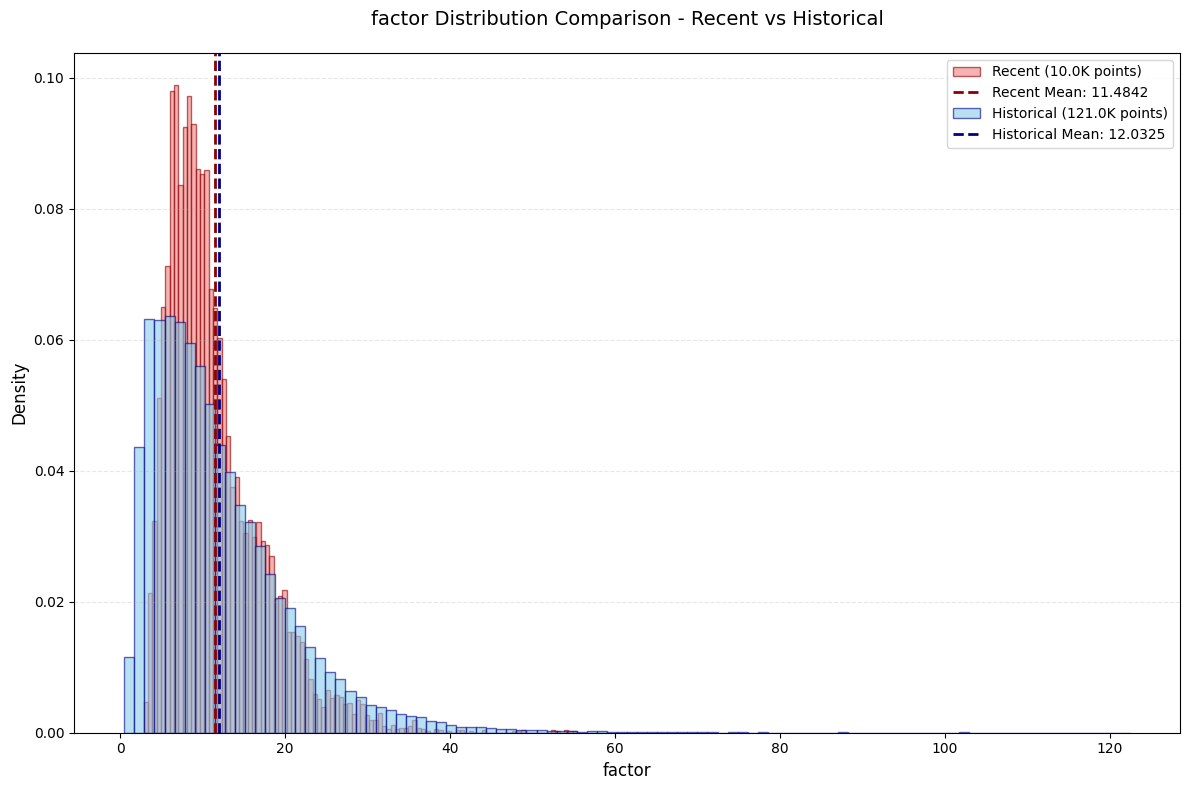

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [5]:
evaluator.set_factor(
    factor_func=factor,
    factor_name='factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

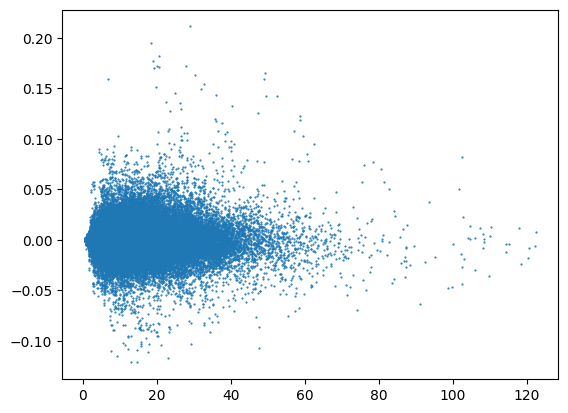

In [6]:
import matplotlib.pyplot as plt
plt.scatter(factor(df),df['close'].pct_change(-10), s=0.3)

In [7]:
result['information_ratio']['group_correlations']
# 这表示不同分组之间的相关性，通常用于评估因子在不同市场状态下的表现一致性。
# 如果相关性较高，说明因子在不同市场状态下表现一致；如果相关性较低，说明因子在不同市场状态下表现差异较大。

[-0.00857843950283771,
 -0.030891525619563424,
 0.0179869191684939,
 0.004093327924832714,
 0.004802970381030896,
 0.0004042179769147879,
 -0.0154697700001662,
 -0.00012329808517159722,
 0.012804701922318269,
 0.041355075997133964]

In [8]:
print(result)

{'correlation_analysis': {'IC': 0.00786458570831495, 'Rank_IC': 0.017087323387566966}, 'information_ratio': {'IR': 0.1423510027322377, 'group_correlations': [-0.00857843950283771, -0.030891525619563424, 0.0179869191684939, 0.004093327924832714, 0.004802970381030896, 0.0004042179769147879, -0.0154697700001662, -0.00012329808517159722, 0.012804701922318269, 0.041355075997133964], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0       0.4900   2.6979    2.0077      -0.0000      0.0040   6552
1       2.6986   3.5950    3.1561      -0.0001      0.0058   6553
2       3.5950   4.3950    3.9952       0.0004      0.0064   6549
3       4.3950   5.2043    4.8098      -0.0001      0.0078   6552
4       5.2043   5.9864    5.5919      -0.0002      0.0090   6550
5       5.9864   6.7314    6.3535       0.0001      0.0090   6551
6       6.7314   7.5057    7.1201       